# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

# **Data segregation**

In [2]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 128
def datafunc(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                img_arr = cv2.cvtColor(img_arr,cv2.COLOR_GRAY2RGB)               
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = datafunc('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = datafunc('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = datafunc('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.3.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.3.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.3.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.3.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



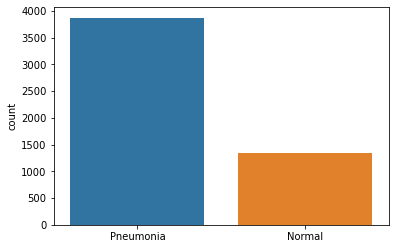

In [4]:
trainlabel = []
for img in train:
    if(img[1] == 0):
        trainlabel.append("Pneumonia")
    else:
        trainlabel.append("Normal")
sns.countplot(trainlabel)        

Text(0.5, 1.0, 'NORMAL')

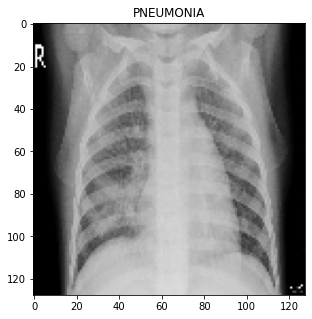

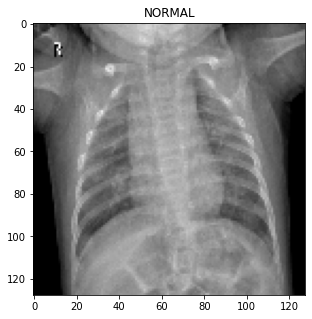

In [5]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [6]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Data processing

In [7]:
x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0
x_val = np.array(x_val)/255.0

In [8]:
x_train = (x_train.reshape(-1,img_size,img_size,3))
x_test = (x_test.reshape(-1,img_size,img_size,3))
x_val = (x_val.reshape(-1,img_size,img_size,3))
x_train.shape

(5216, 128, 128, 3)

In [9]:
y_train=np.array(y_train)
y_test=np.array(y_test)
y_val=np.array(y_val)

# Building the model

In [10]:
datagen= ImageDataGenerator(zoom_range=0.2)

In [11]:
datagen.fit(x_train)

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(128,128,3), kernel_size=(4,4), strides=(1,1), padding="valid"))
model.add(Activation("relu"))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(4,4), strides=(1,1), padding="valid"))
model.add(Activation("relu"))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

model.add(Conv2D(filters=256, kernel_size=(4,4), strides=(1,1), padding="valid"))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding="valid"))

model.add(Conv2D(filters=256, kernel_size=(4,4), strides=(1,1), padding="valid"))
model.add(Activation("relu"))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4086, input_shape=(128*128*3,)))
model.add(Activation("relu"))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation("relu"))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation("relu"))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(2))
model.add(Activation("softmax"))

model.summary()

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 125, 96)      4704      
_________________________________________________________________
activation (Activation)      (None, 125, 125, 96)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 256)       393472    
_________________________________________________________________
activation_1 (Activation)    (None, 59, 59, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 256)       1

# Training and visualizing the results

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("own.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=4, verbose=1, mode='auto')
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 13 , validation_data = datagen.flow(x_test, y_test),callbacks=[checkpoint,early])

Epoch 1/13
163/163 [==============================] - 28s 171ms/step - loss: 1.2982 - accuracy: 0.7544 - val_loss: 0.7831 - val_accuracy: 0.6955
Epoch 2/13
163/163 [==============================] - 27s 166ms/step - loss: 0.3584 - accuracy: 0.8507 - val_loss: 0.6492 - val_accuracy: 0.6554
Epoch 3/13
163/163 [==============================] - 28s 169ms/step - loss: 0.2863 - accuracy: 0.8863 - val_loss: 0.5522 - val_accuracy: 0.7692
Epoch 4/13
163/163 [==============================] - 27s 167ms/step - loss: 0.2880 - accuracy: 0.8802 - val_loss: 0.5969 - val_accuracy: 0.6987
Epoch 5/13
163/163 [==============================] - 27s 169ms/step - loss: 0.2953 - accuracy: 0.8827 - val_loss: 0.6848 - val_accuracy: 0.6971
Epoch 6/13
163/163 [==============================] - 27s 168ms/step - loss: 0.2522 - accuracy: 0.9045 - val_loss: 0.4560 - val_accuracy: 0.8013
Epoch 7/13
163/163 [==============================] - 28s 170ms/step - loss: 0.2157 - accuracy: 0.9135 - val_loss: 0.4532 - val_ac

In [14]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 0s 24ms/step - loss: 0.2950 - accuracy: 0.9071
Loss of the model is -  0.29504522681236267
20/20 [==============================] - 0s 24ms/step - loss: 0.2950 - accuracy: 0.9071
Accuracy of the model is -  90.70512652397156 %


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


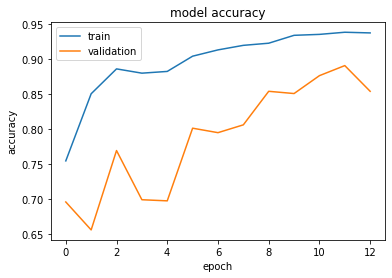

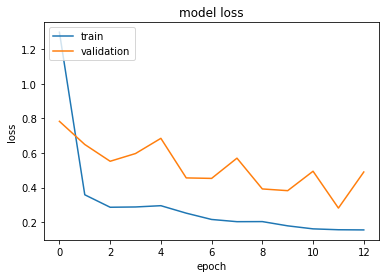

In [15]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:

predictions = model.predict(x_test)
predictions = predictions[:,0]
i=0
for i in range(len(predictions)):
    if predictions[i]>0.5:
        predictions[i]=0
    else:
        predictions[i]=1


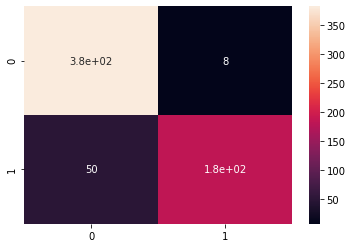

In [17]:
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True)

In [18]:
cm

array([[382,   8],
       [ 50, 184]])